In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
import seaborn as sns
import scipy.sparse
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
baskets = pd.read_parquet('baskets.parquet', engine='pyarrow')
coupons = pd.read_parquet('coupons.parquet', engine='pyarrow')
prediction_index = pd.read_parquet('prediction_index.parquet', engine='pyarrow')

In [6]:
def get_tr(df, week):
    import itertools
    week = [week] if type(week) != list else week

    product = list(range(250))
    shopper = list(range(2000))
    tr = pd.DataFrame(itertools.product(shopper, week, product))
    tr.rename(columns={0:'shopper', 1:'week', 2:'product'}, inplace=True)
    tr = tr.merge(df, how='left', left_on=list(tr.columns), right_on=list(tr.columns))
    tr['purchased'] = tr['price'].notna().astype(int) # target
    #tr['coupon'] = tr['discount'].notna().astype(int)
    return tr

In [7]:
df_full = baskets
df = df_full.loc[df_full['shopper'] < 2000]
tr = get_tr(df, list(range(90)))
tr.to_parquet('tr.parquet')

In [ ]:
tr

In [29]:
stats88.to_pickle('stats88.pkl')

In [75]:
prediction_index['purchase'] = 0
prediction_index

,week,shopper,product,purchase
0,90,0,0,0
1,90,0,1,0
2,90,0,2,0
3,90,0,3,0
4,90,0,4,0
...,...,...,...,...
499995,90,1999,245,0
499996,90,1999,246,0
499997,90,1999,247,0
499998,90,1999,248,0


In [6]:
 try:
    df = pd.read_pickle('df.pkl')
except (OSError, IOError) as e:
    df = baskets.merge(coupons, how='left')
    df['discount'].fillna(0, inplace=True)
    df.to_pickle('df.pkl')

In [ ]:
# create order_id based on individual week and shopper
df['order_id'] = df.groupby(['week', 'shopper']).ngroup()

In [42]:
# create categories based on EDA
bins = list(range(0, 251, 10))
labels = list(range(0, 25))
df['category'] = pd.cut(df['product'], bins=bins, labels=labels, right=False)

In [44]:
# create clusters based on EDA
cluster_labels_list = [1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2]
cluster_labels = pd.DataFrame({"cluster": cluster_labels_list})
df = df.merge(cluster_labels, left_on="category", right_index=True)

In [ ]:
# convert product id to number between 0 - 9
df['product'] = df['product'] % 10

In [ ]:
# EXAMPLES
# measures for purchase timings
get_weekend_pct = lambda x: ((((x==0) | (x==1)).sum()) / x.count())
users['weekend_pct'] = orders.groupby('user_id')['order_dow'].agg(get_weekend_pct)
users['h_mean'] = orders.groupby('user_id')['order_hour_of_day'].mean()

In [ ]:
ave_size = orders.groupby(by='user_id').mean()['order_size'].to_dict()
users['ave_size'] = users['user_id'].apply(lambda x: ave_size[x])

In [52]:
# category frequency
cat_freq_dict = df['category'].value_counts(normalize=True).to_dict()
df['cat_freq'] = df['category'].apply(lambda x: cat_freq_dict[x])

,week,shopper,product,price,discount,order_id,category,cluster,cat_freq
0,0,0,71,629,0.0,0,7,2,0.046352
32,0,4,76,582,0.0,4,7,2,0.046352
50,0,7,79,736,0.0,7,7,2,0.046352
60,0,8,74,584,25.0,8,7,2,0.046352
71,0,9,76,582,0.0,9,7,2,0.046352
...,...,...,...,...,...,...,...,...,...
68841153,89,99939,54,773,0.0,8998578,5,1,0.017199
68841193,89,99945,57,716,0.0,8998584,5,1,0.017199
68841298,89,99961,56,761,0.0,8998600,5,1,0.017199
68841312,89,99963,52,607,0.0,8998602,5,1,0.017199


In [54]:
# product frequency
#product_freq_dict = df['product'].value_counts(normalize=True).to_dict()
#df['product_freq'] = df['product'].apply(lambda x: product_freq_dict[x])

In [63]:
# shopper activity (overall number of products purchased by this customer)
shopper_activity_dict = df.groupby('shopper').size().to_dict()
df['shopper_activity'] = df['shopper'].apply(lambda x: shopper_activity_dict[x])
df['shopper_activity'] = df['shopper_activity'] / df['shopper_activity'].max()

,week,shopper,product,price,discount,order_id,category,cluster,cat_freq,product_freq,shopper_activity
0,0,0,71,629,0.0,0,7,2,0.046352,0.004328,770
32,0,4,76,582,0.0,4,7,2,0.046352,0.013196,558
50,0,7,79,736,0.0,7,7,2,0.046352,0.003129,861
60,0,8,74,584,25.0,8,7,2,0.046352,0.004078,879
71,0,9,76,582,0.0,9,7,2,0.046352,0.013196,754
...,...,...,...,...,...,...,...,...,...,...,...
68841153,89,99939,54,773,0.0,8998578,5,1,0.017199,0.000688,697
68841193,89,99945,57,716,0.0,8998584,5,1,0.017199,0.001471,719
68841298,89,99961,56,761,0.0,8998600,5,1,0.017199,0.001697,474
68841312,89,99963,52,607,0.0,8998602,5,1,0.017199,0.001870,733


In [82]:
# shopper_product_pref (relative frequency of given product in overall purchases by this customer)
#product_pref = df.groupby('shopper')['product'].value_counts(normalize=True)
#product_pref = product_pref.to_frame(name="shopper_product_pref").reset_index()
#df = df.merge(product_pref, how='left')

,shopper,product,shopper_product_pref
0,0,91,0.094805
1,0,225,0.088312
2,0,71,0.087013
3,0,130,0.079221
4,0,184,0.067532
...,...,...,...
7086905,99999,157,0.001299
7086906,99999,210,0.001299
7086907,99999,215,0.001299
7086908,99999,223,0.001299


In [86]:
# shopper_cat_pref (relative frequency of given category in overall purchases by this customer)
cat_pref = df.groupby('shopper')['category'].value_counts(normalize=True)
cat_pref = cat_pref.to_frame(name="shopper_cat_pref").reset_index()
df = df.merge(cat_pref, how='left')

In [120]:
# weeks_since_product_purchase (number of weeks since this customer purchased this product)
# until this feature everything is in the .pkl file
df = df.sort_values(by=['shopper', 'product', 'week'])
df['weeks_since_product_purchase'] = df.groupby(['shopper', 'product'])['week'].diff().fillna(0)

In [119]:
# weeks_since_cat_purchase (number of weeks since this customer purchased this category)
df = df.sort_values(by=['shopper', 'category', 'week'])
df['weeks_since_cat_purchase'] = df.groupby(['shopper', 'category'])['week'].diff().fillna(0)

,week,shopper,product,price,discount,order_id,category,cluster,cat_freq,product_freq,shopper_activity,shopper_product_pref,shopper_cat_pref
0,0,0,71,629,0.0,0,7,2,0.046352,0.004328,770,0.087013,0.111688
1,0,4,76,582,0.0,4,7,2,0.046352,0.013196,558,0.094982,0.094982
2,0,7,79,736,0.0,7,7,2,0.046352,0.003129,861,0.068525,0.089431
3,0,8,74,584,25.0,8,7,2,0.046352,0.004078,879,0.014790,0.089875
4,0,9,76,582,0.0,9,7,2,0.046352,0.013196,754,0.076923,0.090186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68841593,89,99939,54,773,0.0,8998578,5,1,0.017199,0.000688,697,0.020086,0.024390
68841594,89,99945,57,716,0.0,8998584,5,1,0.017199,0.001471,719,0.018081,0.026426
68841595,89,99961,56,761,0.0,8998600,5,1,0.017199,0.001697,474,0.004219,0.008439
68841596,89,99963,52,607,0.0,8998602,5,1,0.017199,0.001870,733,0.008186,0.008186


In [9]:
target_week = 89
# get targets (labels)
targets_df = df[df['week'] == target_week]
targets_df = targets_df.groupby(['shopper', 'category'])[['product']].first()
targets_df.columns = ['target']

In [10]:
targets_df

target
shopper category        
0       6              7
        7              1
        9              1
        12             3
        16             7
...                  ...
99999   14             3
        15             8
        18             6
        20             4
        22             5

[764917 rows x 1 columns]

In [11]:
def calc_mode(x):
    return (x.value_counts().index[0])

def calc_weeks(x):
    return (target_week - x.max())

def get_last_2(x):
    if len(x) > 1:
        return (x.iloc[-2])
    else: 
        return (x.iloc[-1])
    
testi = df.loc[df['week'] < target_week]
testi = testi.sort_values(by=['week', 'product'])
    
stats = testi.groupby(['shopper', 'category']).agg(
    shopper_activity=('shopper_activity', 'first'),
    cat_pref=('shopper_cat_pref', 'first'),
    most_pop_product=('product', calc_mode), 
    last_product=('product', 'last'),
    last_product_2=('product', get_last_2),
    weeks_to_reorder=('weeks_since_product_purchase', 'mean'),
    weeks_since_last_order=('week', calc_weeks)
)
stats['time_delta']= stats['weeks_to_reorder']-stats['weeks_since_last_order']

# merge with targets
stats = stats.merge(targets_df, left_index=True, right_index=True, how='outer')
stats.fillna('10', inplace=True)

In [22]:
def transform_stats(stats):
    stats = stats.astype('float32')
    cat_features = [
        'most_pop_product',
        'last_product',
        'last_product_2',
        'target'
    ]
    stats[cat_features] = stats[cat_features].astype('category')
    return(stats)
# checking
#df[(df['shopper'] == 0) &(df['category'] == 18) & (df['week'] == target_week)]

In [30]:
stats88 = pd.read_pickle('stats88.pkl')
stats89 = pd.read_pickle('stats89.pkl')

In [44]:
# split train (X) and labels (y)
y_test = stats89['target'].ravel()
X_test = stats89.drop('target', axis=1)

In [46]:
X_test

shopper_activity  cat_pref most_pop_product last_product  \
shopper category                                                             
0       0                 0.647603  0.010390              4.0          4.0   
        1                 0.647603  0.018182              1.0          6.0   
        2                 0.647603  0.001299              1.0          1.0   
        3                 0.647603  0.007792              8.0          8.0   
        4                 0.647603  0.003896              8.0          8.0   
...                            ...       ...              ...          ...   
99999   20                0.647603  0.077922              4.0          4.0   
        21                0.647603  0.048052              1.0          2.0   
        22                0.647603  0.097403              5.0          6.0   
        23                0.647603  0.024675              1.0          4.0   
        24                0.647603  0.070130              8.0          8.0   

                 last_product_2  weeks_to_reorder  weeks_since_last_order  \
shopper category                                                            
0       0                   4.0          5.750000                    19.0   
        1                   1.0          8.928572                     1.0   
        2                   1.0          0.000000                     3.0   
        3                   8.0          8.833333                    28.0   
        4                   6.0         23.000000                    16.0   
...                         ...               ...                     ...   
99999   20                  4.0          1.983051                     1.0   
        21                  1.0          4.594594                     2.0   
        22                  4.0          4.851351                     1.0   
        23                  1.0          8.842105                     1.0   
        24                  8.0          1.629630                     1.0   

                  time_delta  
shopper category              
0       0         -13.250000  
        1           7.928571  
        2          -3.000000  
        3         -19.166666  
        4           7.000000  
...                      ...  
99999   20          0.983051  
        21          2.594594  
        22          3.851351  
        23          7.842105  
        24          0.629630  

[2412429 rows x 8 columns]

In [54]:
y_train.ravel()

[10.0, 10.0, 10.0, 10.0, 10.0, ..., 4.0, 10.0, 5.0, 10.0, 10.0]
Length: 2412429
Categories (11, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.0, 8.0, 9.0, 10.0]

In [53]:
y_train

shopper  category
0        0           10.0
         1           10.0
         2           10.0
         3           10.0
         4           10.0
                     ... 
99999    20           4.0
         21          10.0
         22           5.0
         23          10.0
         24          10.0
Name: target, Length: 2412429, dtype: category
Categories (11, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.0, 8.0, 9.0, 10.0]

In [233]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [38]:
import _pickle as cPickle 

In [237]:
# save the classifier
with open('clf.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

In [39]:
# load it again
with open('clf.pkl', 'rb') as fid:
    clf = cPickle.load(fid)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [50]:
X_test

shopper_activity  cat_pref most_pop_product last_product  \
shopper category                                                             
0       0                 0.647603  0.010390              4.0          4.0   
        1                 0.647603  0.018182              1.0          6.0   
        2                 0.647603  0.001299              1.0          1.0   
        3                 0.647603  0.007792              8.0          8.0   
        4                 0.647603  0.003896              8.0          8.0   
...                            ...       ...              ...          ...   
99999   20                0.647603  0.077922              4.0          4.0   
        21                0.647603  0.048052              1.0          2.0   
        22                0.647603  0.097403              5.0          6.0   
        23                0.647603  0.024675              1.0          4.0   
        24                0.647603  0.070130              8.0          8.0   

                 last_product_2  weeks_to_reorder  weeks_since_last_order  \
shopper category                                                            
0       0                   4.0          5.750000                    19.0   
        1                   1.0          8.928572                     1.0   
        2                   1.0          0.000000                     3.0   
        3                   8.0          8.833333                    28.0   
        4                   6.0         23.000000                    16.0   
...                         ...               ...                     ...   
99999   20                  4.0          1.983051                     1.0   
        21                  1.0          4.594594                     2.0   
        22                  4.0          4.851351                     1.0   
        23                  1.0          8.842105                     1.0   
        24                  8.0          1.629630                     1.0   

                  time_delta  
shopper category              
0       0         -13.250000  
        1           7.928571  
        2          -3.000000  
        3         -19.166666  
        4           7.000000  
...                      ...  
99999   20          0.983051  
        21          2.594594  
        22          3.851351  
        23          7.842105  
        24          0.629630  

[2412429 rows x 8 columns]

In [63]:
y_test=pd.to_numeric(y_test)

In [69]:
y_test

array([10., 10., 10., ...,  5., 10., 10.])

In [70]:
preds = clf.predict_proba(X_test)

In [73]:
preds

array([[0.00382686, 0.00164175, 0.0024652 , ..., 0.00161469, 0.00432391,
        0.93268318],
       [0.00353688, 0.10347204, 0.0044667 , ..., 0.00149234, 0.00399626,
        0.86200837],
       [0.00376046, 0.06137448, 0.00491984, ..., 0.00158668, 0.00424888,
        0.9164986 ],
       ...,
       [0.02075614, 0.02073017, 0.03025975, ..., 0.01710786, 0.02345202,
        0.36895411],
       [0.00346948, 0.10150032, 0.00991608, ..., 0.00285966, 0.00392011,
        0.84558229],
       [0.00986756, 0.00985521, 0.01438561, ..., 0.38782776, 0.01114919,
        0.4764591 ]])

In [74]:
from sklearn.metrics import log_loss
log_loss(y_test,preds)

5.262519446501397

In [59]:
y_test

[10.0, 10.0, 10.0, 10.0, 10.0, ..., 4.0, 10.0, 5.0, 10.0, 10.0]
Length: 2412429
Categories (11, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.0, 8.0, 9.0, 10.0]

In [47]:
clf.score(X_test, y_test)

0.6336878722648418

- regular_price > each product has regular price, discount for product, sensitivity
- cat_pref > base purchase probability for category and customer (proportion of all purchases by this customer)
- product_pref > base purchase probability for product, measured on overall product popularity
- weeks_since_cat_purchase > days since customer purchased products in the same category
- n_stockpiling > number of products in last category purchase
- (Substitution effects (within and across categories))
- (Complementarity effects (across categories))
- (was_on_sale > product had a discount in the last week)
- (Promotion in complementary category)

### Information
- Products belong to C (unknown) categories
- Products within categories are substitutes
- Categories are related (complements and substitutes)
- Prices vary over time, customers receive (personalized) discounts
- Customers have different product preferences
- What should be the target variable?
- Two obvious choices: (1) J binary classification vs. (2) C multinomial classification models
- For option 2: How can we create interdependencies between categories?

### Useful Information
- Base purchase probability
- Effect of recent category purchase
- Discount for product
- Promotion in complementary category
- Promotion for substitute in same category


## Suggested Features

#### Features based on raw data:
- Binary product purchase events
- Discounts (own product, cross-product)
- Product labels

#### Features derived through simple data transformations:
- Time since last product purchase
- Product purchase frequencies
- Coupon redemption rate

#### Features based on secondary models:
- Infer categories and use category labels as features
- Features aggregated by category (e.g., purchase events, discounts)´

In [264]:
baskets['order_id'] = baskets.groupby(['week', 'shopper']).ngroup()

### Clustering

In [265]:
# create a (binary) space matrix that indicates whether a basket (row) contains a product (col)
# co-occurrences are the dot produdct of this basket-product matrix
# return data frame
def co_occurrences_sparse(x, variable_basket="basket", variable_product="product"):
    row = x[variable_basket].values
    col = x[variable_product].values
    dim = (x[variable_basket].max()+1, x[variable_product].max()+1)

    basket_product_table = scipy.sparse.csr_matrix(
        (np.ones(len(row), dtype=int), (row, col)),
        shape=dim
    )
    co_occurrences_sparse = basket_product_table.T.dot(basket_product_table).tocoo()
    co_occurrences_df = pd.DataFrame({
        "product_1": co_occurrences_sparse.row,
        "product_2": co_occurrences_sparse.col,
        "co-occurrence": co_occurrences_sparse.data,
    })
    return co_occurrences_df

In [266]:
co_occurrences_df = co_occurrences_sparse(
    x=baskets,
    variable_basket="order_id",
    variable_product="product"
)
co_occurrences_df = co_occurrences_df.sort_values(["product_1", "product_2"]).reset_index()
co_occurrences_df

,index,product_1,product_2,co-occurrence
0,240,0,0,161640
1,2513,0,10,3055
2,2702,0,11,7751
3,2963,0,12,2483
4,3212,0,13,5849
...,...,...,...,...
60245,57094,249,236,8891
60246,57243,249,237,20648
60247,57529,249,238,15771
60248,57775,249,239,3079


In [267]:
pivot_df = co_occurrences_df.pivot(index="product_1", columns="product_2", values="co-occurrence")
pivot_df = pivot_df.fillna(0)
pivot_df

product_2,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
product_1,,,,,,,,,,,,,,,,,,,,,
0,161640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4932.0,574.0,11041.0,2026.0,763.0,1362.0,4780.0,470.0,4828.0,18119.0
1,0.0,536705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16124.0,2228.0,12742.0,7224.0,6068.0,7541.0,12030.0,2107.0,30629.0,17982.0
2,0.0,0.0,167169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,946.0,2356.0,11997.0,950.0,999.0,4089.0,6190.0,2170.0,15655.0,4817.0
3,0.0,0.0,0.0,63468.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1081.0,354.0,3406.0,1172.0,569.0,976.0,2155.0,250.0,3421.0,12281.0
4,0.0,0.0,0.0,0.0,216964.0,0.0,0.0,0.0,0.0,0.0,...,3372.0,4143.0,5252.0,6948.0,3067.0,3387.0,4136.0,290.0,2862.0,23128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1362.0,7541.0,4089.0,976.0,3387.0,459.0,2909.0,3529.0,4082.0,4958.0,...,0.0,0.0,0.0,0.0,0.0,138586.0,0.0,0.0,0.0,0.0
246,4780.0,12030.0,6190.0,2155.0,4136.0,12211.0,4874.0,1002.0,4063.0,5273.0,...,0.0,0.0,0.0,0.0,0.0,0.0,218078.0,0.0,0.0,0.0
247,470.0,2107.0,2170.0,250.0,290.0,929.0,1064.0,2680.0,2432.0,1487.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65194.0,0.0,0.0


In [268]:
# Normalize DataFrame
pivot_df_zeros = pivot_df
# since diagonal values are very high, we ignore them for now
# to compare the relationship between products
np.fill_diagonal(pivot_df_zeros.values, 0)
column_maxes = pivot_df_zeros.max()
df_max = column_maxes.max()
np.fill_diagonal(pivot_df_zeros.values, df_max)
normalized_zeros_df = pivot_df_zeros / df_max
dist = 1 - normalized_zeros_df
dist

product_2,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
product_1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.974007,0.996975,0.941811,0.989322,0.995979,0.992822,0.974808,0.997523,0.974555,0.904508
1,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.915022,0.988258,0.932846,0.961928,0.968020,0.960257,0.936599,0.988896,0.838577,0.905230
2,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.995014,0.987583,0.936773,0.994993,0.994735,0.978450,0.967377,0.988564,0.917494,0.974613
3,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.994303,0.998134,0.982049,0.993823,0.997001,0.994856,0.988643,0.998682,0.981970,0.935276
4,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.982229,0.978165,0.972321,0.963382,0.983836,0.982150,0.978202,0.998472,0.984917,0.878109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.992822,0.960257,0.978450,0.994856,0.982150,0.997581,0.984669,0.981401,0.978487,0.973870,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
246,0.974808,0.936599,0.967377,0.988643,0.978202,0.935645,0.974313,0.994719,0.978587,0.972210,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
247,0.997523,0.988896,0.988564,0.998682,0.998472,0.995104,0.994392,0.985876,0.987183,0.992163,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


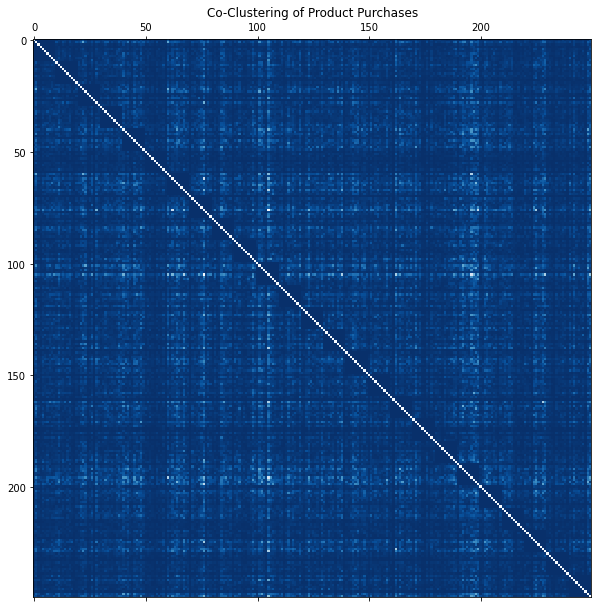

In [269]:
plt.matshow(dist, cmap=plt.cm.Blues)
plt.title("Co-Clustering of Product Purchases")
plt.show()

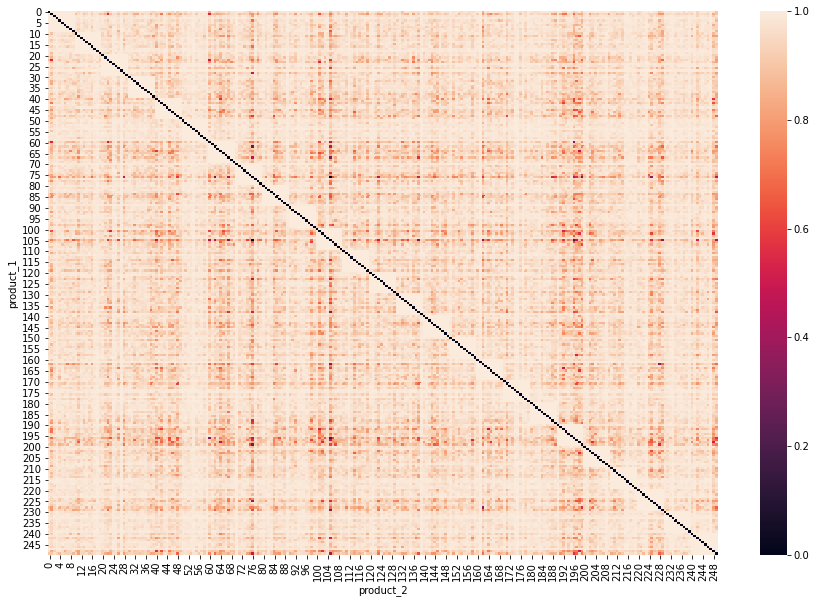

In [270]:
sns.heatmap(dist);

### Create Product Categories

In [271]:
cut_bins = list(range(0, 251, 10))
cut_labels = list(range(0, 25))
baskets['product_cat'] = pd.cut(baskets['product'], bins=cut_bins, labels=cut_labels, right=False)

In [13]:
baskets

,week,shopper,product,price,order_id,product_cat
0,0,0,71,629,0,7
1,0,0,91,605,0,9
2,0,0,116,715,0,11
3,0,0,123,483,0,12
4,0,0,157,592,0,15
...,...,...,...,...,...,...
68841593,89,99999,143,470,8998638,14
68841594,89,99999,158,566,8998638,15
68841595,89,99999,186,499,8998638,18
68841596,89,99999,204,496,8998638,20


In [272]:
cat_co_occurrences_df = co_occurrences_sparse(
    x=baskets,
    variable_basket="order_id",
    variable_product="product_cat"
)
cat_co_occurrences_df = cat_co_occurrences_df.sort_values(["product_1", "product_2"]).reset_index()
cat_co_occurrences_df

,index,product_1,product_2,co-occurrence
0,24,0,0,2175300
1,25,0,1,483201
2,51,0,2,679819
3,79,0,3,693296
4,115,0,4,898182
...,...,...,...,...
620,506,24,20,796141
621,538,24,21,641742
622,555,24,22,1176848
623,594,24,23,411973


In [273]:
cat_co_occurrences_df = cat_co_occurrences_df.rename(columns={"product_1": "cat_1", "product_2": "cat_2"})
cat_co_occurrences_df

,index,cat_1,cat_2,co-occurrence
0,24,0,0,2175300
1,25,0,1,483201
2,51,0,2,679819
3,79,0,3,693296
4,115,0,4,898182
...,...,...,...,...
620,506,24,20,796141
621,538,24,21,641742
622,555,24,22,1176848
623,594,24,23,411973


In [274]:
cat_pivot_df = cat_co_occurrences_df.pivot(index="cat_1", columns="cat_2", values="co-occurrence")
cat_pivot_df

cat_2,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cat_1,,,,,,,,,,,,,,,,,,,,,
0,2175300,483201,679819,693296,898182,332533,1107574,916306,648558,573262,...,497846,889546,461271,535876,1114943,546179,428611,777330,342434,629797
1,483201,2095487,578338,595444,775933,294662,938092,807280,610162,606929,...,560709,613555,450930,533113,1153157,565948,465920,796035,309227,700367
2,679819,578338,2747046,734031,1088993,342771,1486465,970499,728605,693178,...,544805,875316,503817,917496,1617375,828036,621952,873589,413785,764884
3,693296,595444,734031,2530168,984807,357629,1267477,933977,747256,746141,...,795916,944202,675812,652353,1327812,691445,571066,875548,399541,765466
4,898182,775933,1088993,984807,3726597,427959,1620520,1135116,1041711,914633,...,851474,1276136,774164,986221,2400646,1102314,908108,1160453,570402,1166422
5,332533,294662,342771,357629,427959,1183984,539069,465358,353006,360198,...,315668,405851,254485,280752,661487,361144,257818,488365,179530,397372
6,1107574,938092,1486465,1267477,1620520,539069,3925173,1551544,1142611,1038447,...,869732,1552628,864129,1156929,2223366,1156720,772075,1490070,591233,1216547
7,916306,807280,970499,933977,1135116,465358,1551544,3190940,958200,822145,...,918982,1039116,737175,894936,1600561,962245,807649,1291285,503686,917667
8,648558,610162,728605,747256,1041711,353006,1142611,958200,2541483,770150,...,680560,806018,577482,641621,1418860,745566,568113,857212,389864,818533


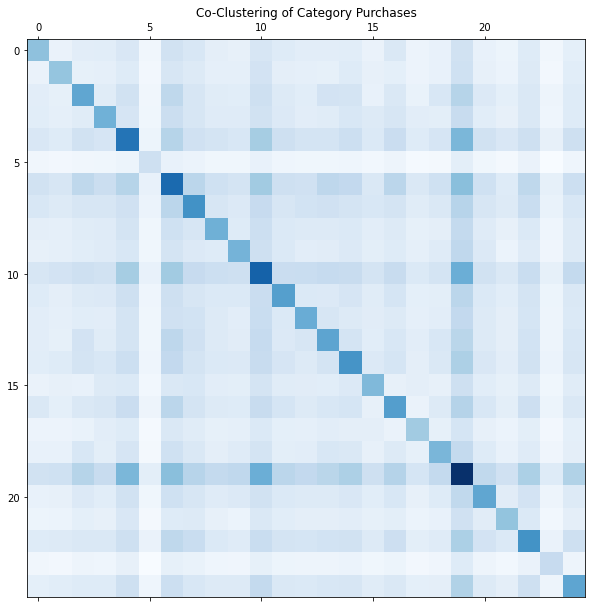

In [275]:
plt.matshow(cat_pivot_df, cmap=plt.cm.Blues)
plt.title("Co-Clustering of Category Purchases")
plt.show()

In [276]:
# rescale high diagonal values to mean
def rescale_diagonal(df):
    np.fill_diagonal(df.values, 0)
    df_max = df.mean().mean()
    np.fill_diagonal(df.values, df_max)
    return df

In [277]:
cat_dist = rescale_diagonal(cat_pivot_df)
cat_dist


cat_2,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cat_1,,,,,,,,,,,,,,,,,,,,,
0,813473,483201,679819,693296,898182,332533,1107574,916306,648558,573262,...,497846,889546,461271,535876,1114943,546179,428611,777330,342434,629797
1,483201,813473,578338,595444,775933,294662,938092,807280,610162,606929,...,560709,613555,450930,533113,1153157,565948,465920,796035,309227,700367
2,679819,578338,813473,734031,1088993,342771,1486465,970499,728605,693178,...,544805,875316,503817,917496,1617375,828036,621952,873589,413785,764884
3,693296,595444,734031,813473,984807,357629,1267477,933977,747256,746141,...,795916,944202,675812,652353,1327812,691445,571066,875548,399541,765466
4,898182,775933,1088993,984807,813473,427959,1620520,1135116,1041711,914633,...,851474,1276136,774164,986221,2400646,1102314,908108,1160453,570402,1166422
5,332533,294662,342771,357629,427959,813473,539069,465358,353006,360198,...,315668,405851,254485,280752,661487,361144,257818,488365,179530,397372
6,1107574,938092,1486465,1267477,1620520,539069,813473,1551544,1142611,1038447,...,869732,1552628,864129,1156929,2223366,1156720,772075,1490070,591233,1216547
7,916306,807280,970499,933977,1135116,465358,1551544,813473,958200,822145,...,918982,1039116,737175,894936,1600561,962245,807649,1291285,503686,917667
8,648558,610162,728605,747256,1041711,353006,1142611,958200,813473,770150,...,680560,806018,577482,641621,1418860,745566,568113,857212,389864,818533


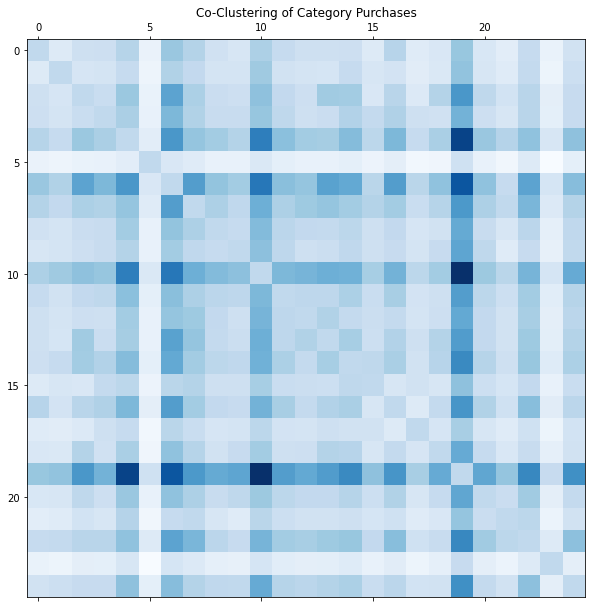

In [278]:
plt.matshow(cat_dist, cmap=plt.cm.Blues)
plt.title("Co-Clustering of Category Purchases")
plt.show()

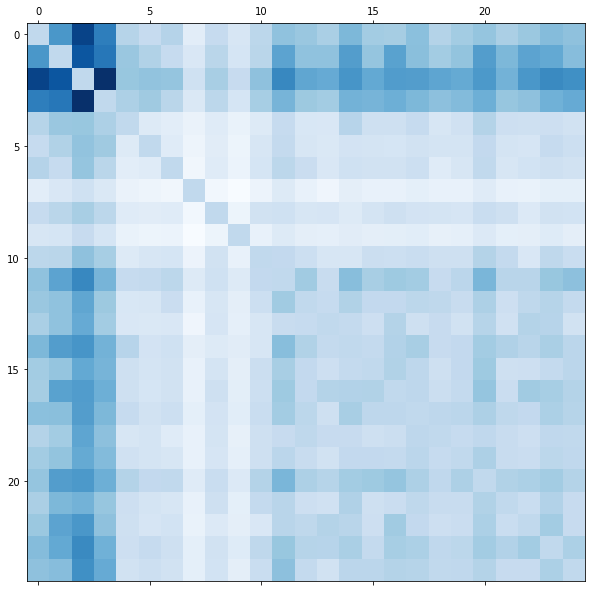

In [279]:
df_agg = cat_dist.to_numpy()
model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=3).fit(df_agg)
new_order = np.argsort(model.labels_)
ordered_dist = df_agg[new_order] # can be your original matrix instead of dist[]
ordered_dist = ordered_dist[:,new_order]
plt.matshow(ordered_dist, cmap=plt.cm.Blues)

In [280]:
cluster_labels = pd.DataFrame({"cluster": model.labels_})
baskets = baskets.merge(cluster_labels, left_on="product_cat", right_index=True)

In [283]:
baskets

,week,shopper,product,price,order_id,product_cat,cluster
0,0,0,71,629,0,7,2
32,0,4,76,582,4,7,2
50,0,7,79,736,7,7,2
60,0,8,74,584,8,7,2
71,0,9,76,582,9,7,2
...,...,...,...,...,...,...,...
68841153,89,99939,54,773,8998578,5,1
68841193,89,99945,57,716,8998584,5,1
68841298,89,99961,56,761,8998600,5,1
68841312,89,99963,52,607,8998602,5,1


,week,shopper,product,price,order_id,product_cat,cluster
0,0,0,71,629,0,7,2
32,0,4,76,582,4,7,2
50,0,7,79,736,7,7,2
60,0,8,74,584,8,7,2
71,0,9,76,582,9,7,2
78,0,10,77,721,10,7,2
103,0,13,79,736,13,7,2
116,0,14,78,625,14,7,2
157,0,20,78,625,20,7,2
166,0,21,78,625,21,7,2
